In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import copy

In [6]:
load_model = models.vgg19(weights="IMAGENET1K_V1")
print(load_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [7]:
print(load_model(torch.randn(1,3,224,224)).shape)

torch.Size([1, 1000])


In [15]:
from torchinfo import summary
summary(load_model, input_size=(1,3,224,224), device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [1, 1000]                 --
├─Sequential: 1-1                        [1, 512, 7, 7]            --
│    └─Conv2d: 2-1                       [1, 64, 224, 224]         1,792
│    └─ReLU: 2-2                         [1, 64, 224, 224]         --
│    └─Conv2d: 2-3                       [1, 64, 224, 224]         36,928
│    └─ReLU: 2-4                         [1, 64, 224, 224]         --
│    └─MaxPool2d: 2-5                    [1, 64, 112, 112]         --
│    └─Conv2d: 2-6                       [1, 128, 112, 112]        73,856
│    └─ReLU: 2-7                         [1, 128, 112, 112]        --
│    └─Conv2d: 2-8                       [1, 128, 112, 112]        147,584
│    └─ReLU: 2-9                         [1, 128, 112, 112]        --
│    └─MaxPool2d: 2-10                   [1, 128, 56, 56]          --
│    └─Conv2d: 2-11                      [1, 256, 56, 56]          29

In [16]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(224,224)),  # size is (height, width)
    # transforms.CenterCrop(size=(224,224)), # size is (height, width)
])

In [19]:
with open('your path/data/imagenet1000_clsidx_to_labels.txt') as f:
    idx2label = eval(f.read()) # use eval to change to dictionary (str -> dict)
print(idx2label[998])

ear, spike, capitulum


<class 'numpy.ndarray'>
(900, 900, 3)
<class 'torch.Tensor'>
torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


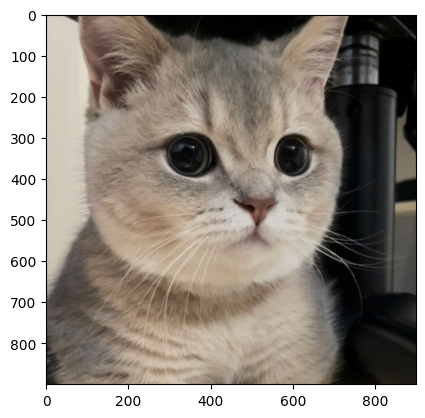

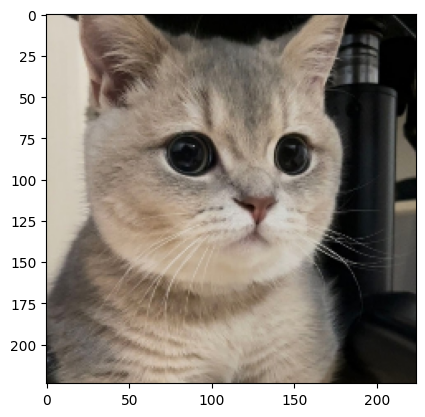

In [22]:
x = plt.imread('your path/data/munchkin.jpeg')
print(type(x))
print(x.shape)
plt.imshow(x)

print('='*30)

x = transform(x)
print(type(x))
print(x.shape)
plt.figure()
plt.imshow(x.permute(1,2,0))

x = x.unsqueeze(dim=0)
print(x.shape)

In [28]:
load_model.eval()
with torch.no_grad():
    y_hat_sorted = load_model(x).sort(descending=True)
    # print(y_hat_sorted)
    percent_top5 = F.softmax(y_hat_sorted[0], dim=1)[0,:5]*100
    # print(percent_top5)
    pred_top5 = y_hat_sorted[1][0,:5] # [1] is in index after being sorted
    # print(pred_top5)
for i, idx in enumerate(pred_top5):
    print(idx2label[idx.item()],end="")
    print(f'({round(percent_top5[i].item(),1)} %)')

Siamese cat, Siamese(48.3 %)
lynx, catamount(13.7 %)
carton(7.4 %)
plastic bag(7.0 %)
Egyptian cat(5.4 %)


Text(0.5, 1.0, 'Siamese cat, Siamese')

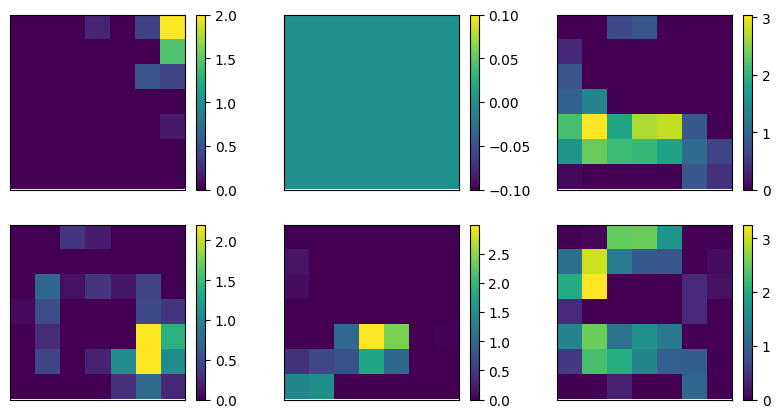

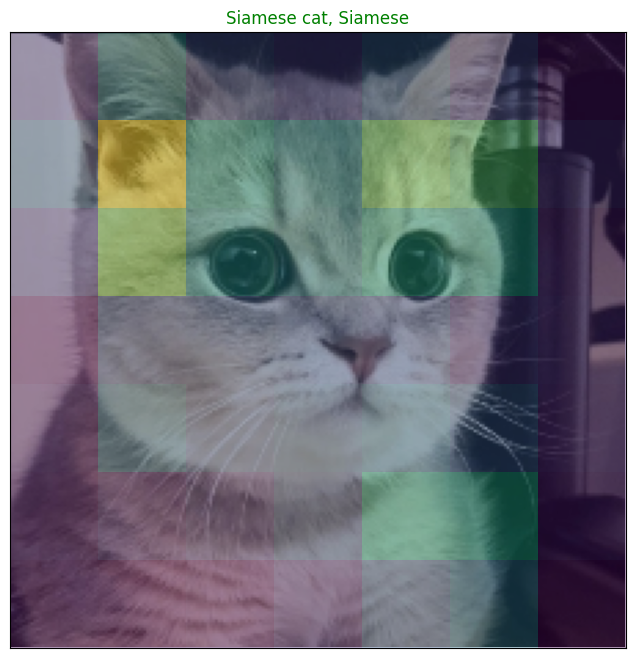

In [29]:
load_model.eval()
with torch.no_grad():
    x_feature = load_model.features(x)
    x_feature = load_model.avgpool(x_feature).cpu()

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1, xticks=[], yticks=[])
    plt.imshow(x_feature[0,i,:,:])
    plt.colorbar()

summed_map = x_feature.sum(dim=1)
plt.figure(figsize=(8,8))
plt.xticks([]); plt.yticks([])
plt.imshow(x[0,...].cpu().permute(1,2,0))
plt.imshow(summed_map[0,...], extent=[0,224,224,0], alpha=0.4)
pred_class = idx2label[pred_top5[0].item()]
plt.title(pred_class, color='g')